In [1]:
# use the following if running in VS Code
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

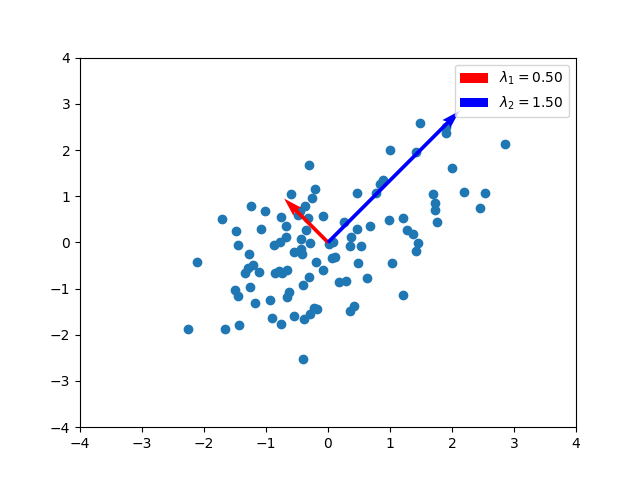

In [2]:
N = 2
P = 100
rho = 0.5  # vary this and see how fast the algorithm converges!
rule = 'oja'  # 'oja' or 'hebbian'

cov = [[1, rho], [rho, 1]]
X = np.random.multivariate_normal([0, 0], cov, P)
eigvals, eigvecs = np.linalg.eigh(cov)

# plot all of the points and the two eigenvectors
plt.scatter(X[:, 0], X[:, 1])
plt.quiver([0], [0], [eigvecs[0, 0]], [eigvecs[1, 0]], color=['r'], scale=4 * (1 / eigvals[0]), label=rf'$\lambda_1 = {eigvals[0]:.2f}$')
plt.quiver([0], [0], [eigvecs[0, 1]], [eigvecs[1, 1]], color=['b'], scale=4 * (1 / eigvals[1]), label=rf'$\lambda_2 = {eigvals[1]:.2f}$')
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

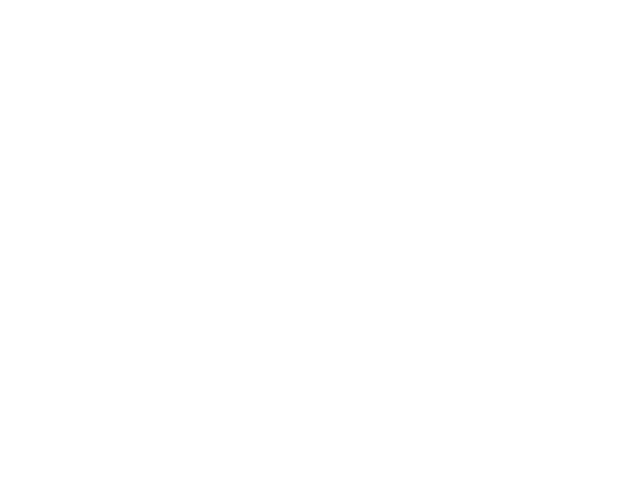

In [3]:
fig = plt.figure()

w = np.random.randn(N)
lr = 0.03

def update(i):
    global w
    x = X[i]
    y = w @ x
    if rule == 'hebbian':
        w += lr * y * x
    elif rule == 'oja':
        w += lr * (y * x - y*y * w)
    else:
        raise ValueError('unknown rule')

    plt.cla()

    # highlight the current point
    plt.scatter(X[:i, 0], X[:i, 1], color='gray')
    plt.scatter(X[i, 0], X[i, 1], color='red')
    plt.scatter(X[i+1:, 0], X[i+1:, 1], color='gray')

    # plot the current w and the two eigenvectors
    plt.quiver([0], [0], [eigvecs[0, 0]], [eigvecs[1, 0]], color=['r'], scale=4 * (1 / eigvals[0]), label=rf'$\lambda_1 = {eigvals[0]:.2f}$')
    plt.quiver([0], [0], [eigvecs[0, 1]], [eigvecs[1, 1]], color=['b'], scale=4 * (1 / eigvals[1]), label=rf'$\lambda_2 = {eigvals[1]:.2f}$')
    plt.quiver([0], [0], [w[0]], [w[1]], color=['g'], scale=4, label=rf'$||w||_2 = {np.linalg.norm(w):.2f}$')
    plt.legend()
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

ani = FuncAnimation(fig, update, frames=P, interval=100)
plt.show()

# ani.save(f'{rule}.gif', writer='imagemagick', fps=10)